# Examen final de Desarrollo de Aplicaciones para la Visualización de Datos

Nombre: ELENA EUGENIA

Apellidos: RODRIGUEZ RODRIGUEZ-SAINZ


Tiempo: 2 horas y 30 minutos

## Contexto del ejercicio

El Ayuntamiento de Madrid desea entender en más detalle la situación del problema habitacional en la ciudad de Madrid basada en múltiples fuentes de datos como alquiler vacacional, evolución del precio de alquiler, inflacción y densidad poblacional.

El objetivo del análisis es buscar patrones para entender mejor que está sucediendo, que barrios son los más estresados y que factores son que hacen que el precio de la vivienda esté en máximos. Por lo tanto, se pide:

1. Realizar un análisis descriptivo de los datos con al menos 6 visualizaciones diferentes. (3 Puntos)
2. Realizar un modelo de regresión lineal que explique (mostrar coeficientes) la dinámica del precio de la vivienda en base a los datos de alquiler vacacional a nivel agregado, no por barrio. (2 Puntos)
3. Montar un dashboard con 4 visualizaciones diferentes cómo mínimo. (2 Punto)
4. Concluir todo este análisis haciendo un informe con 2 páginas como mínimo que incluya, preguntas que se van a responder, dashboard resumen que sustente las preguntas y recomendaciones para mejorar la situación habitacional a partir de los resultados obtenidos de los análisis realizados con los datos. (3 Puntos)

## Juego de datos

Para realizar este análisis se provee un juego de datos con las siguientes variables:


| **Variable**           | **Descripción**                                                                                     | **Tipo**                 |
|-------------------------|-----------------------------------------------------------------------------------------------------|--------------------------|
| `neighbourhood_group`   | Grupo de vecindarios o distritos en Madrid.                                                        | Categórica               |
| `date`                 | Fecha de la observación en formato `YYYY-MM-DD`.                                                   | Temporal                 |
| `m2_price`             | Precio promedio por metro cuadrado en euros.                                                       | Cuantitativa continua     |
| `inflation`            | Inflación mensual como porcentaje (incremento en los precios al consumidor).                       | Cuantitativa continua     |
| `HICP`                 | Índice armonizado de precios al consumidor (indicador de inflación en la zona euro).               | Cuantitativa continua     |
| `population_density`   | Densidad de población anual por km² para toda la Comunidad de Madrid.                                                  | Cuantitativa continua     |
| `listings_count`       | Número total de propiedades listadas en Airbnb en un vecindario.                                   | Cuantitativa discreta     |
| `minimum_nights`       | Número mínimo de noches requerido para alquilar una propiedad.                                     | Cuantitativa discreta     |
| `nigth_price`          | Precio promedio por noche de las propiedades en Airbnb.                                            | Cuantitativa continua     |
| `availability_365`     | Número de días al año que una propiedad está disponible para alquilarse.                           | Cuantitativa discreta     |
| `listing_reviews`      | Número promedio de reseñas por propiedad listada.                                                 | Cuantitativa continua     |
| `number_of_reviews`    | Total acumulado de reseñas para todas las propiedades en un vecindario.                            | Cuantitativa discreta     |
| `reviews_per_month`    | Número promedio de reseñas recibidas por una propiedad al mes.                                     | Cuantitativa continua     |
| `hosts_count`          | Número de anfitriones activos en un vecindario.                                                   | Cuantitativa discreta     |
| `Private_room`         | Número de propiedades que ofrecen habitaciones privadas.                                           | Cuantitativa discreta     |
| `Entire_home`          | Número de propiedades que ofrecen viviendas completas.                                             | Cuantitativa discreta     |
| `Hotel_room`           | Número de propiedades categorizadas como habitaciones de hotel.                                    | Cuantitativa discreta     |
| `Shared_room`          | Número de propiedades que ofrecen habitaciones compartidas.                                        | Cuantitativa discreta     |


Ejemplos de preguntas que se pueden realizar a los datos:
1. ¿Cuál es el precio promedio del metro cuadrado (m2_price) por neighbourhood_group y cómo ha cambiado con el tiempo (date)?
2. ¿Existe una correlación entre el precio por metro cuadrado (m2_price) y la densidad de población (population_density)?
3. ¿Qué patrones estacionales se pueden identificar en las reseñas mensuales (reviews_per_month) o en la disponibilidad anual (availability_365)?
4. ¿Qué vecindarios tienen el mayor número de anfitriones (hosts_count) y cómo se relaciona con el precio de la vivienda?
5. ¿Qué vecindarios muestran el mayor crecimiento en precios (m2_price o nigth_price) entre años (year)?
6. ¿Qué factores (e.g., inflation, availability_365, population_density) explican mejor las variaciones en el precio por metro cuadrado (m2_price) o el precio por noche (nigth_price)?

Nota:
- Puedes hacer group_by para sacar variables agregadas por fecha.
- Se valorará la creatividad en las hipótesis, soluciones y limpieza del código y visualizaciones.

## Entrega del exámen

Compartir Url de github con:
- notebook que responde a las preguntas 1, 2 y 3
- PDF respondiendo a la pregunta 4

Puedes entregar el exámen en el siguiente enlace:

https://forms.gle/xe3En2raC3C3UUY39


# Librerías necesarias

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Análisis descriptivos


In [63]:
df = pd.read_csv('housing_time_series_by_madrid_neighbourhood.csv')
print(df.head())


  neighbourhood_group        date  m2_price  inflation  HICP  \
0              Centro  2010-08-01      15.3        0.3   1.6   
1              Centro  2011-01-01      15.6       -0.7   3.0   
2              Centro  2011-02-01      15.4        0.1   3.4   
3              Centro  2011-05-01      15.0        0.0   3.4   
4              Centro  2011-06-01      15.0       -0.1   3.0   

   population_density  listings_count  minimum_nights  nigth_price  \
0                 796               1             2.0   114.000000   
1                 800               1             2.0   114.000000   
2                 800               4             7.0   184.000000   
3                 800               5             9.6    61.000000   
4                 800               5             5.4   135.333333   

   availability_365  listing_reviews  number_of_reviews  reviews_per_month  \
0            305.00                1              155.0             0.9000   
1            305.00                1  

# EJERICIO 1- Visualizaciones

## Visualizacion 1
Con esta grafica se quiere entender como se distribuyen los difernetes tipos de propiedades segun los barrios para saber si esto sigue una tendencia 

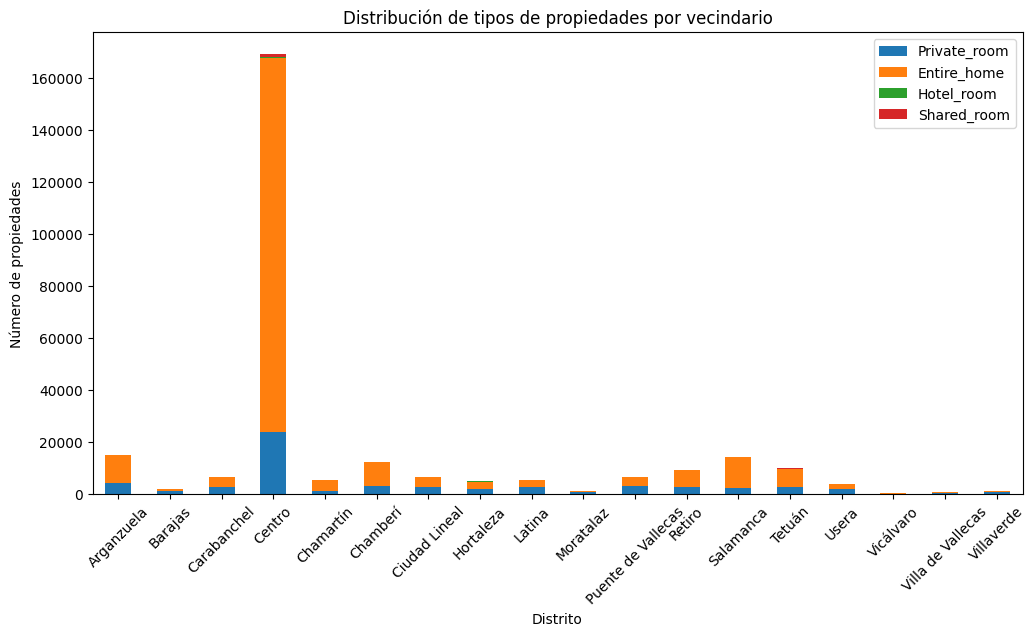

In [4]:
df_types = df.groupby(['neighbourhood_group'])[['Private_room', 'Entire_home', 'Hotel_room', 'Shared_room']].sum().reset_index()

df_types.set_index('neighbourhood_group').plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribución de tipos de propiedades por vecindario')
plt.xlabel('Distrito')
plt.ylabel('Número de propiedades')
plt.xticks(rotation=45)
plt.show()


Como se puede observar con el grafico de la distribucion de tipo de propiedades, nos queda claro que el numero de propiedades mas elevado se encuentra en el distrito centro de Madrid y el resto de distritos tienen una concentracion mucho penor de propiedades. Con esta grafica ademas de ver los distritos mas populares para el alquiler vacacional, se puede ver la tendencia que existe en los distritos. Esta grafica afirma la hipotesis de que las propiedades con mas numero de propiedades son los alojamientos enteros. 
Ya que con el datset dado, existen 4 tipos de propiedades: 
- Habitacion privada
- Habitacion de Hotel
- Habitacion compratida
- Apartamento completo
Con esta grafica nos queda claro que los apartamento privados son los mas encontrados en AirBnb

## Visualizacion 2
Esta visualizacion quiere responder a la pregunta de si existe una relecion entre numero de host y el total de propiedades listadas segun el barrio

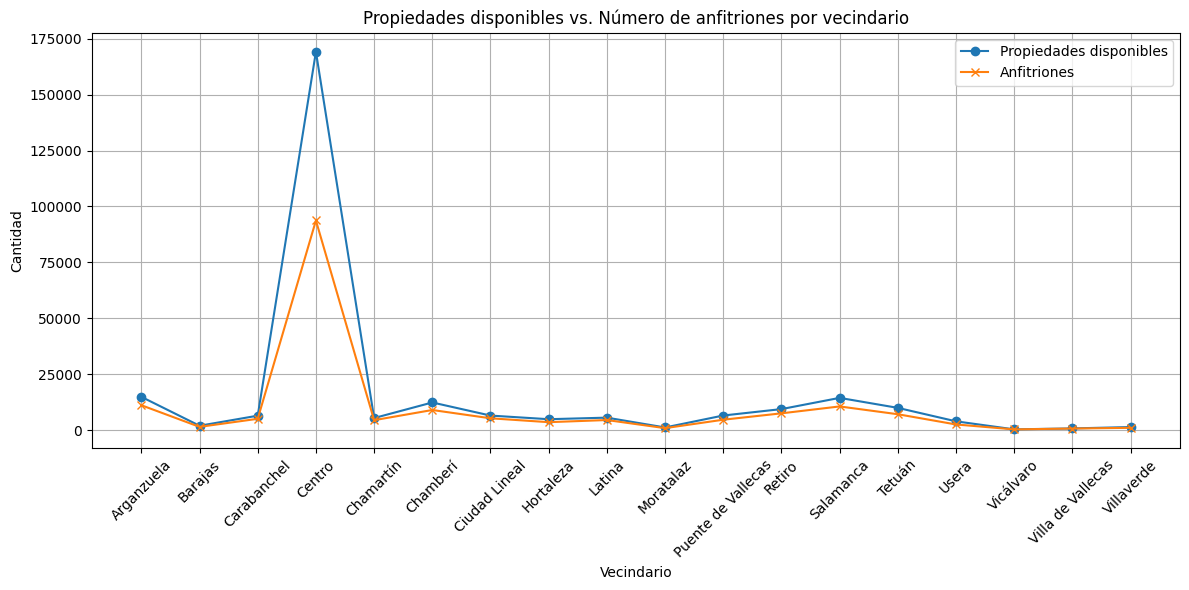

In [5]:

neighborhood_stats = df.groupby('neighbourhood_group').agg({'listings_count': 'sum', 'hosts_count': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(neighborhood_stats['neighbourhood_group'], neighborhood_stats['listings_count'], marker='o', label='Propiedades disponibles')
plt.plot(neighborhood_stats['neighbourhood_group'], neighborhood_stats['hosts_count'], marker='x', label='Anfitriones')

plt.title('Propiedades disponibles vs. Número de anfitriones por vecindario')
plt.xlabel('Vecindario')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Distribucion de los precios por noche
Esta grafica quire mostrar la distribucion de los precios sigue alguna tendencia

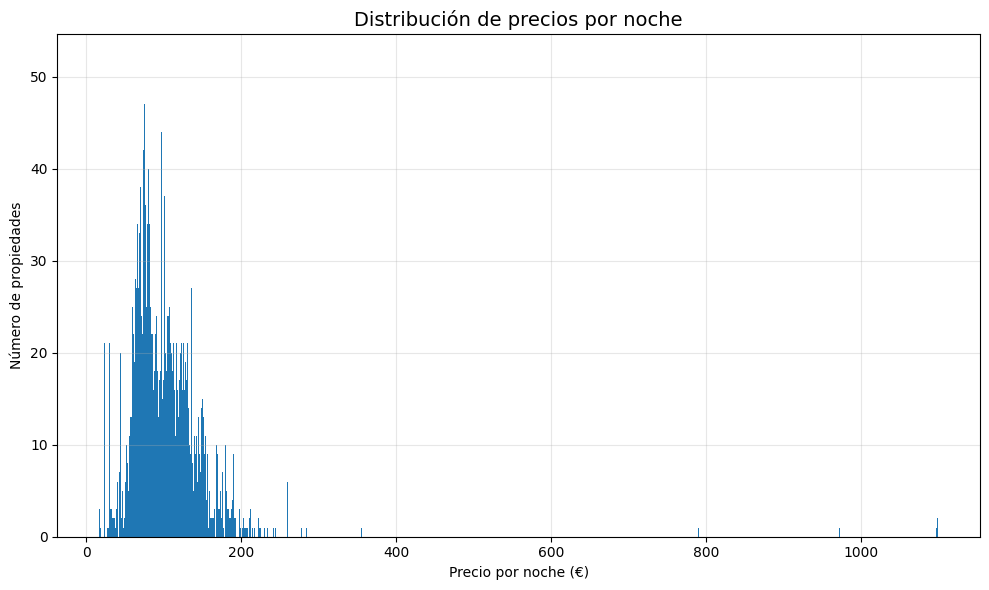

In [6]:

plt.figure(figsize=(10, 6))
plt.hist(df['nigth_price'], bins=1000)

plt.title('Distribución de precios por noche', fontsize=14)
plt.xlabel('Precio por noche (€)')
plt.ylabel('Número de propiedades')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


Como sepuede observar en la grafica el rango de los precios en Madrid estan en torno a los 70 hasta los 200 euros la noche ya que todas las observaciones se acumulan ahi 

# Visualizacion 4: Relacion entre la inflacion y la variacion del precio 
Se quiere analizar la realcion entere el indice macroeconimico como es la inflacion y la variacion de los precios

C:\Users\eugen\AppData\Local\Temp\ipykernel_35784\1522242450.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



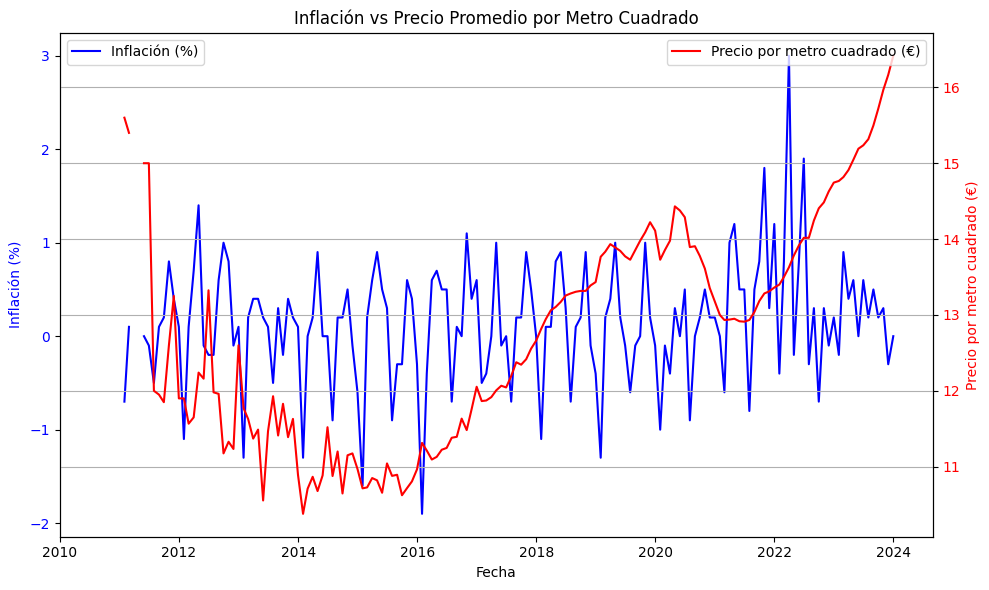

In [64]:

df['date'] = pd.to_datetime(df['date'])
df_inflation_price = df.groupby([pd.Grouper(key='date', freq='M')])[['inflation', 'm2_price']].mean().reset_index()

# Crear una figura y un primer eje
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graficar inflación en el primer eje
ax1.plot(df_inflation_price['date'], df_inflation_price['inflation'], label='Inflación (%)', color='blue')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Inflación (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear un segundo eje para el precio por metro cuadrado
ax2 = ax1.twinx()
ax2.plot(df_inflation_price['date'], df_inflation_price['m2_price'], label='Precio por metro cuadrado (€)', color='red')
ax2.set_ylabel('Precio por metro cuadrado (€)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Títulos y leyenda
plt.title('Inflación vs Precio Promedio por Metro Cuadrado')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotar las fechas en el eje X
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()  # Ajusta el gráfico para evitar recortes
plt.show()



 # Visualizacion 5: Precio Promedio por Distrito 
 Se quiere analizar tanto el precio promedio del metro cuadrado por distrito como el precio por la noche

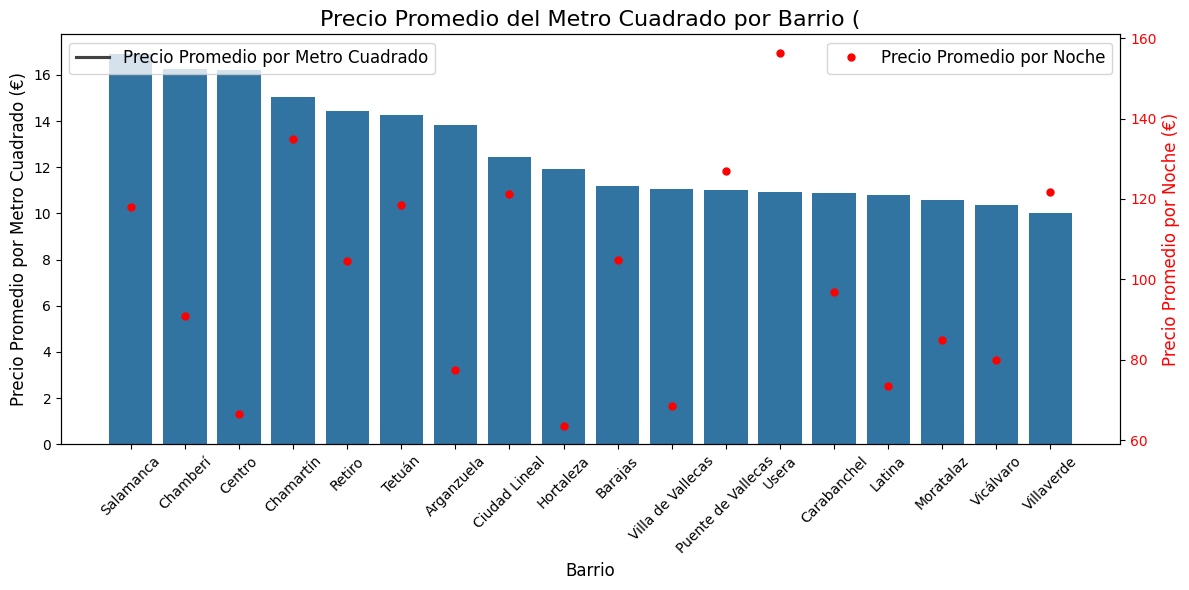

In [66]:

df_sorted = df.sort_values('m2_price', ascending=False)
df_barrio = df_sorted.groupby('neighbourhood_group')['m2_price'].mean().reset_index()


df_barrio_night_price = df_sorted.groupby('neighbourhood_group')['nigth_price'].mean().reset_index()


fig, ax1 = plt.subplots(figsize=(12, 6))


sns.barplot(x='neighbourhood_group', y='m2_price', data=df_barrio,
            order=df_barrio.sort_values('m2_price', ascending=False)['neighbourhood_group'], ax=ax1,
            )  
ax1.set_title('Precio Promedio del Metro Cuadrado por Distrito ', fontsize=16)
ax1.set_xlabel('Distrito', fontsize=12)
ax1.set_ylabel('Precio Promedio por Metro Cuadrado (€)', fontsize=12)
ax1.tick_params(axis='x', rotation=45)


ax2 = ax1.twinx()
ax2.set_ylabel('Precio Promedio por Noche (€)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')


for i, barrio in enumerate(df_barrio['neighbourhood_group']):
    avg_night_price = df_barrio_night_price[df_barrio_night_price['neighbourhood_group'] == barrio]['nigth_price'].values[0]
    ax2.plot(i, avg_night_price, 'ro', markersize=5)  # 'ro' para un punto rojo


ax1.legend(['Precio Promedio por Metro Cuadrado'], loc='upper left', fontsize=12)
ax2.legend(['Precio Promedio por Noche'], loc='upper right', fontsize=12)


plt.tight_layout()
plt.show()


# Evolucion del precio promedio por metro cuadrado por distrito

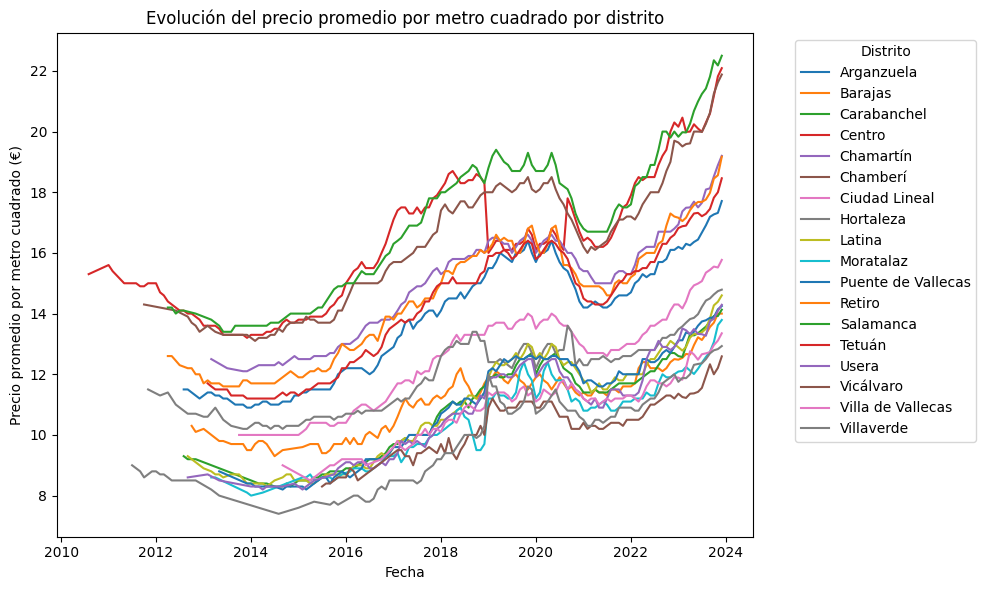

In [70]:

df_neigh = df.groupby(['neighbourhood_group', 'date'])['m2_price'].mean().reset_index()


plt.figure(figsize=(10, 6))
for group in df_neigh['neighbourhood_group'].unique():
    data = df_neigh[df_neigh['neighbourhood_group'] == group]
    plt.plot(data['date'], data['m2_price'], label=group)
plt.title('Evolución del precio promedio por metro cuadrado por distrito')
plt.xlabel('Fecha')
plt.ylabel('Precio promedio por metro cuadrado (€)')

plt.legend(title='Distrito', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() 
plt.show()

# EJERCIO 2- Modelo Lineal

En este ejercico se quier obtener un modelo con los de regresion lineal teniendo en cuenta todas las variables y la capacidad predictiva de las misma a la hora de predecir el precio 

In [40]:
#creamos modelo de regresion lineal 
df['date'] = pd.to_datetime(df['date'])

df_model = df[['m2_price', 'listings_count', 'nigth_price', 'availability_365', 'inflation',
               'HICP', 'population_density', 'number_of_reviews', 'minimum_nights',
               'hosts_count', 'Private_room', 'Entire_home', 'Hotel_room', 'Shared_room']]


df_model = df_model.dropna()


X = df_model.drop('m2_price', axis=1)  
y = df_model['m2_price']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coeficientes'])
intercept = model.intercept_

# Resultados

print("Error cuadrático medio (MSE):", mse)
print("R^2 del modelo:", r2)

# Predicción para los datos de prueba
predicciones = pd.DataFrame({'Precio Real': y_test, 'Predicción': y_pred})
print(predicciones.head())

Error cuadrático medio (MSE): 3.6164209998004186
R^2 del modelo: 0.5752952199255117
      Precio Real  Predicción
1553        10.60   12.926935
450          8.30    6.396723
96          11.00   10.936579
650          9.40   11.005426
2002        20.16   20.492975


In [39]:
coefficients
df_sorted = coefficients.sort_values('Coeficientes', ascending=False)
print(df_sorted)

                    Coeficientes
listings_count      1.999108e+11
population_density  4.156780e-02
hosts_count         4.151917e-02
inflation           2.507052e-02
nigth_price         8.728027e-03
availability_365    6.849766e-04
number_of_reviews   5.936623e-05
minimum_nights     -1.223582e-02
HICP               -2.507603e-02
Shared_room        -1.999108e+11
Entire_home        -1.999108e+11
Private_room       -1.999108e+11
Hotel_room         -1.999108e+11


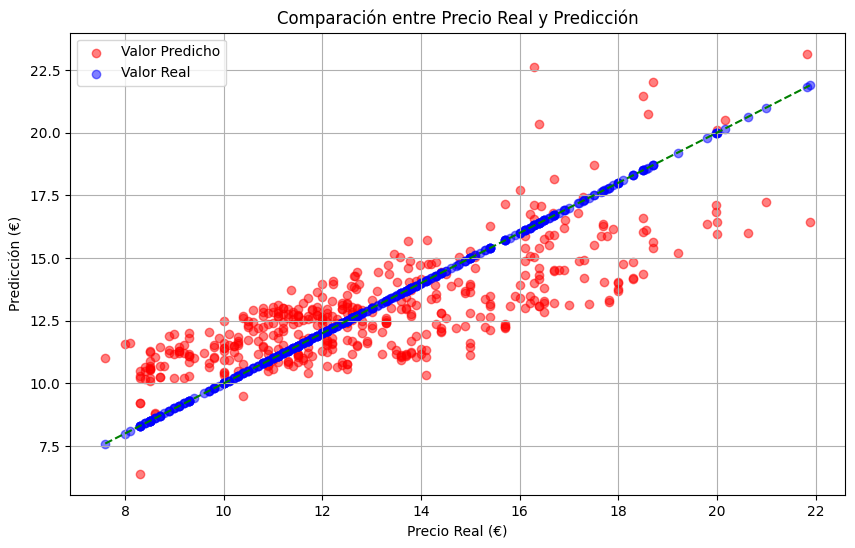

In [27]:
# Gráfico de valores reales vs predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='red', alpha=0.5, label='Valor Predicho')
plt.scatter(y_test, y_test, color='blue', alpha=0.5, label='Valor Real')  # Puntos azules para valores reales
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linestyle='--')  # Línea de referencia
plt.title('Comparación entre Precio Real y Predicción')
plt.xlabel('Precio Real (€)')
plt.ylabel('Predicción (€)')
plt.legend()
plt.grid(True)
plt.show()

Tras realizar el modelo de regresion lineal vamos ha evaluar que tan bueno es este modelo. Este modelo tiene como objetivo predecir el precio medio por metro cuadrado de cada una de las propiedades y para ello utiliza todos las variables del Dataset. Tras establecer la varaible independiente y las varaibles eplicativas se procede a realizar un division de conjunto de datos en dos subconjuntos, el conjunto test y el conjunto train en un ratio 20-80 respectivamente. 
Una vez entrenado el modelo usando la regresion lineal se procede a comprobar los resultados, tenemos un R^2 de 0,58 lo que inidica que el modelo creado no es capaz de explicarse con las variables dadas y por otro lado un RMSE de 3,6 un error relativamente alto, ya que indica que cada propiedad tiene un error medio de prediccion de 3,6 euros. 

Ademas tambien es fundamental tener en cuenta aquellas varaibles mas relevantes para el modelo, para ello se ha convertido los coeficientes en un dataset para que se pueda visualizar mejor. Las variables qeu afectan de manera mas positiva al modelo son: "listing_count", "population_density" ) y de manera negativa ("HIPC", "Shared romm" y "Entire_Room") 

Por otro lado la ultima grafica muestra la compracion entre el precio real y el precio predicho y se puede comprobar que esta se desvia considerablemente de los valores reales. 

Como recomendacion considero que se deberia de emplear un modelo mas robusto como por ejemplo Random Forest capaz de identificar mejor los patrones. 

# Ejercico 3- Creacion Dash

C:\Users\eugen\AppData\Local\Temp\ipykernel_35784\648154847.py:54: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
TypeError: Object of type Figure is not JSON serializable



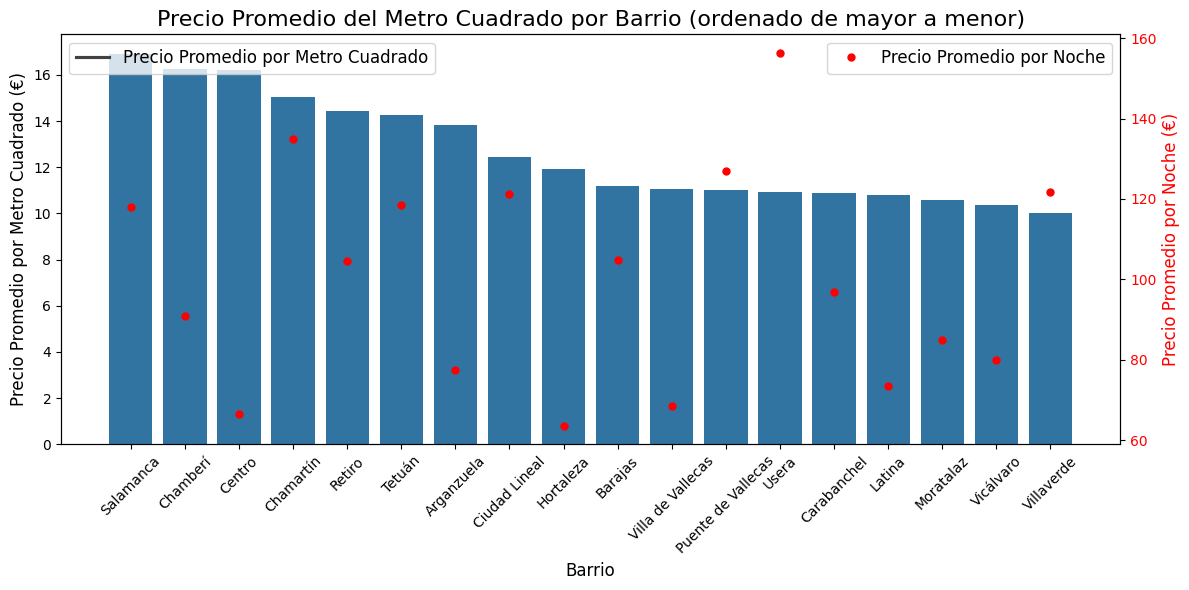

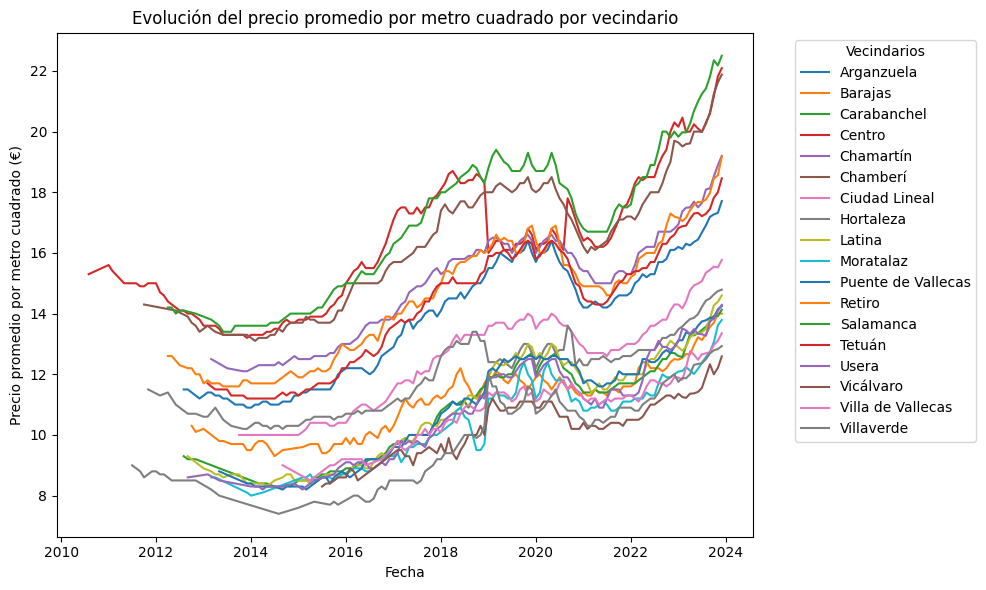

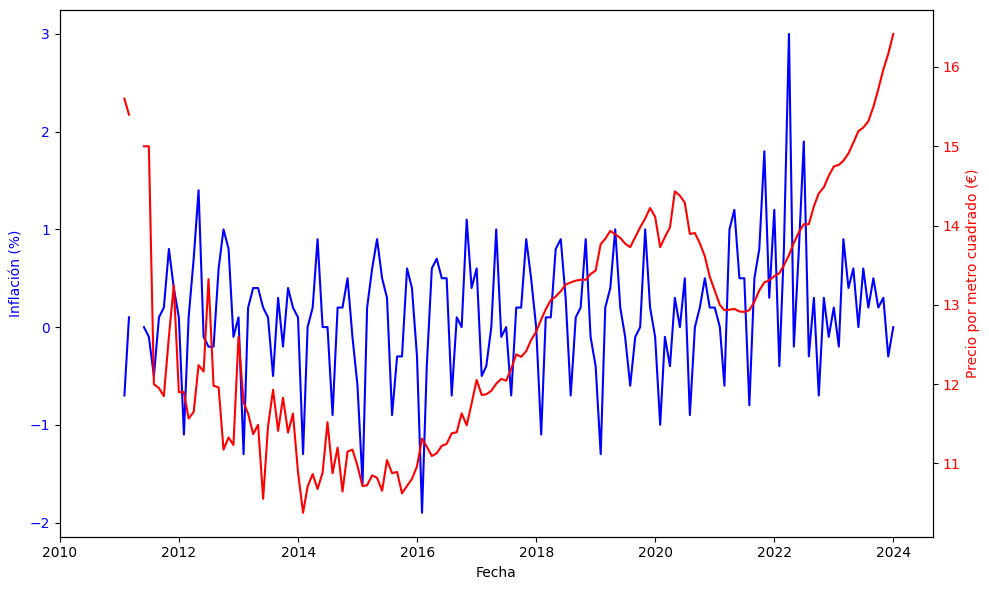

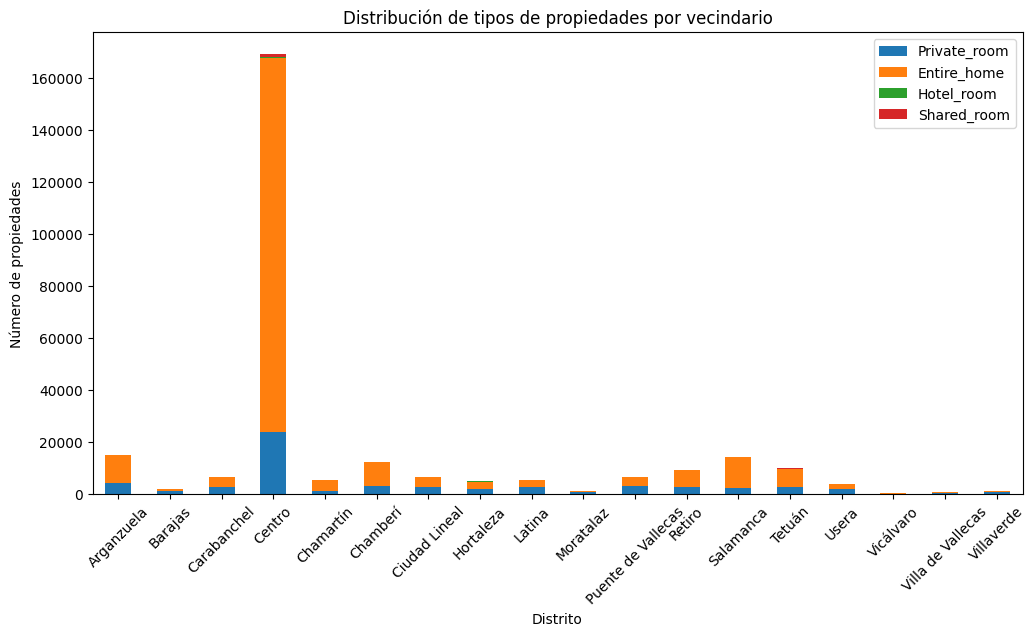

In [75]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go


app = dash.Dash(__name__)

# figura 1
df_sorted = df.sort_values('m2_price', ascending=False)
df_barrio = df_sorted.groupby('neighbourhood_group')['m2_price'].mean().reset_index()
df_barrio_night_price = df_sorted.groupby('neighbourhood_group')['nigth_price'].mean().reset_index()

fig1, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(x='neighbourhood_group', y='m2_price', data=df_barrio,
            order=df_barrio.sort_values('m2_price', ascending=False)['neighbourhood_group'], ax=ax1)
ax1.set_title('Precio Promedio del Metro Cuadrado por Barrio (ordenado de mayor a menor)', fontsize=16)
ax1.set_xlabel('Barrio', fontsize=12)
ax1.set_ylabel('Precio Promedio por Metro Cuadrado (€)', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()
ax2.set_ylabel('Precio Promedio por Noche (€)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

for i, barrio in enumerate(df_barrio['neighbourhood_group']):
    avg_night_price = df_barrio_night_price[df_barrio_night_price['neighbourhood_group'] == barrio]['nigth_price'].values[0]
    ax2.plot(i, avg_night_price, 'ro', markersize=5)

ax1.legend(['Precio Promedio por Metro Cuadrado'], loc='upper left', fontsize=12)
ax2.legend(['Precio Promedio por Noche'], loc='upper right', fontsize=12)

fig1.tight_layout()

#  figura 2
df_grouped = df.groupby(['neighbourhood_group', 'date'])['m2_price'].mean().reset_index()

fig2 = plt.figure(figsize=(10, 6))
for group in df_grouped['neighbourhood_group'].unique():
    data = df_grouped[df_grouped['neighbourhood_group'] == group]
    plt.plot(data['date'], data['m2_price'], label=group)
plt.title('Evolución del precio promedio por metro cuadrado por vecindario')
plt.xlabel('Fecha')
plt.ylabel('Precio promedio por metro cuadrado (€)')
plt.legend(title='Vecindarios', bbox_to_anchor=(1.05, 1), loc='upper left')
fig2.tight_layout()

# figura 3
df['date'] = pd.to_datetime(df['date'])
df_inflation_price = df.groupby([pd.Grouper(key='date', freq='M')])[['inflation', 'm2_price']].mean().reset_index()

fig3, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(df_inflation_price['date'], df_inflation_price['inflation'], label='Inflación (%)', color='blue')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Inflación (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(df_inflation_price['date'], df_inflation_price['m2_price'], label='Precio por metro cuadrado (€)', color='red')
ax2.set_ylabel('Precio por metro cuadrado (€)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig3.tight_layout()

# Crear la figura 4
df_types = df.groupby(['neighbourhood_group'])[['Private_room', 'Entire_home', 'Hotel_room', 'Shared_room']].sum().reset_index()

fig4 = df_types.set_index('neighbourhood_group').plot(kind='bar', stacked=True, figsize=(12, 6))
fig4.set_title('Distribución de tipos de propiedades por vecindario')
fig4.set_xlabel('Distrito')
fig4.set_ylabel('Número de propiedades')
fig4.set_xticklabels(fig4.get_xticklabels(), rotation=45)

# Layout de Dash
app.layout = html.Div([
    html.H1("TITULO DASH"),
    html.Div([
        html.Div([
            dcc.Graph(figure=fig1)
        ]),
        html.Div([
            dcc.Graph(figure=fig2)
        ]),
    ], className='row'),
    html.Div([
        dcc.Graph(figure=fig3)
    ]),
    html.Div([
        dcc.Graph(figure=fig4)
    ])
])

if __name__ == '__main__':
    app.run_server(debug=True)
